In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import xgboost

In [3]:
data_train=pd.read_csv('./Data/train.csv')
data_test=pd.read_csv('./Data/test.csv')
ids_test=data_test.Id

In [24]:
data_train.motor_type.value_counts()

motor_type
petrol            1420
gas                165
petrol and gas      54
diesel               2
hybrid               1
Name: count, dtype: int64

In [4]:
data_train.head()

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1642 non-null   object 
 1   year          1642 non-null   int64  
 2   motor_type    1642 non-null   object 
 3   running       1642 non-null   object 
 4   wheel         1642 non-null   object 
 5   color         1642 non-null   object 
 6   type          1642 non-null   object 
 7   status        1642 non-null   object 
 8   motor_volume  1642 non-null   float64
 9   price         1642 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 128.4+ KB


In [6]:
data_train.isna().sum()

model           0
year            0
motor_type      0
running         0
wheel           0
color           0
type            0
status          0
motor_volume    0
price           0
dtype: int64

In [7]:
data_train.describe()

,year,motor_volume,price
count,1642.000000,1642.000000,1642.000000
mean,2014.805725,2.035018,15982.633374
std,6.587573,0.253069,7176.084647
min,1987.000000,0.200000,462.000000
25%,2013.000000,2.000000,12000.000000
50%,2017.000000,2.000000,15750.000000
75%,2019.000000,2.000000,18500.000000
max,2023.000000,4.000000,87000.000000


In [8]:
data_train.describe(include=['O'])

,model,motor_type,running,wheel,color,type,status
count,1642,1642,1642,1642,1642,1642,1642
unique,5,5,643,1,17,7,5
top,mercedes-benz,petrol,300000 km,left,black,sedan,excellent
freq,402,1420,19,1642,541,1276,1200


In [9]:
data_train.isna().sum()

model           0
year            0
motor_type      0
running         0
wheel           0
color           0
type            0
status          0
motor_volume    0
price           0
dtype: int64

<Axes: xlabel='running', ylabel='Count'>

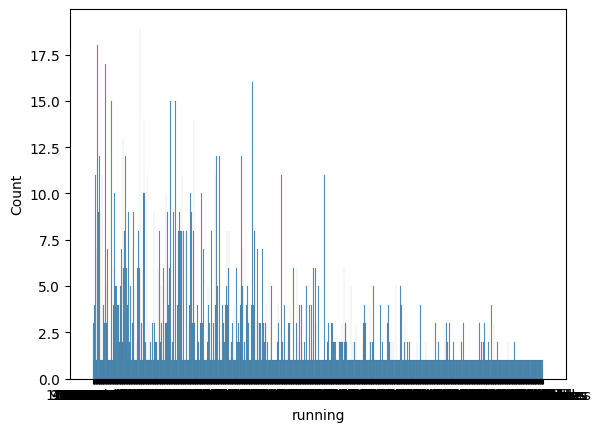

In [10]:
sns.histplot(data_train['running'])

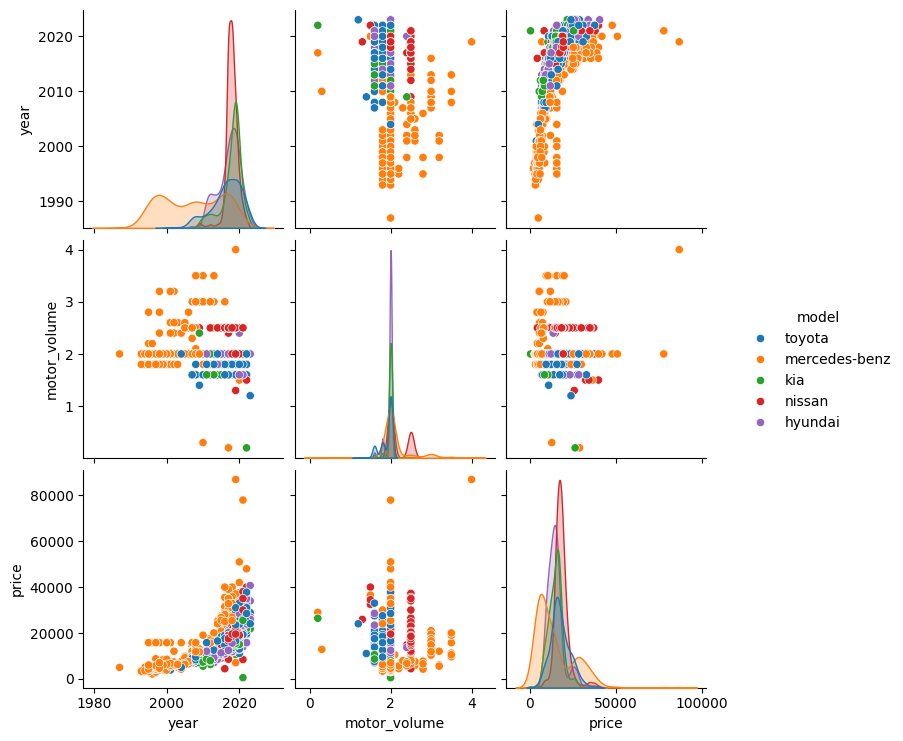

In [11]:
sns.pairplot(data=data_train,hue='model')

In [12]:
#Datos por modelo
data_train.groupby('model').agg({
    'price':['mean'],
    'motor_volume':['mean']
}).reset_index()

,model,price,motor_volume
,,mean,mean
0,hyundai,14829.957265,1.976923
1,kia,14857.284211,1.978947
2,mercedes-benz,14728.808458,2.107463
3,nissan,18284.822857,2.149143
4,toyota,17650.291339,1.906299


In [13]:
data_train.groupby('status').agg({
    'price':['describe','median']
})

price                                                         \
          describe                                                          
             count          mean           std      min      25%      50%   
status                                                                      
crashed       29.0  13862.068966   4513.900261   3100.0  12500.0  13100.0   
excellent   1200.0  17399.503333   6772.018099    462.0  13800.0  16450.0   
good         334.0  11913.862275   5642.455570   3000.0   7600.0  11450.0   
new           21.0  25080.952381  13318.957131  12100.0  19900.0  23000.0   
normal        58.0   7864.655172   4529.019574   2100.0   4350.0   6000.0   

                                      
                              median  
               75%      max    price  
status                                
crashed    15700.0  24500.0  13100.0  
excellent  19500.0  87000.0  16450.0  
good       15500.0  37500.0  11450.0  
new        25500.0  78000.0  23000.0  
normal     10000.0  17000.0   6000.0

In [14]:
data_train.groupby(by=['model','type']).agg({
    'price':['median']
}).reset_index()

,model,type,price
,,,median
0,hyundai,Coupe,11500.0
1,hyundai,hatchback,15500.0
2,hyundai,sedan,14000.0
3,kia,Coupe,7600.0
4,kia,Universal,14900.0
5,kia,hatchback,12700.0
6,kia,sedan,15350.0
7,mercedes-benz,Coupe,33600.0
8,mercedes-benz,Universal,15750.0


In [15]:
data_train.shape

(1642, 10)

In [16]:
data_train.groupby(['type']).agg({
    'price':['median']
})

,price
,median
type,
Coupe,11000.0
Universal,17700.0
hatchback,14900.0
minivan / minibus,5000.0
pickup,15750.0
sedan,14700.0
suv,17900.0


In [17]:
data_train['running']=data_train['running'].apply(lambda x: float(x.split(' ')[0]) * 1.60934 if x.split(' ')[2]=='miles' else float(x.split(' ')[0]))

In [18]:
print(len(data_train[data_train['price']>40000]))
print(len(data_train[data_train['price']<1000]))

6
1


<Axes: xlabel='price', ylabel='Count'>

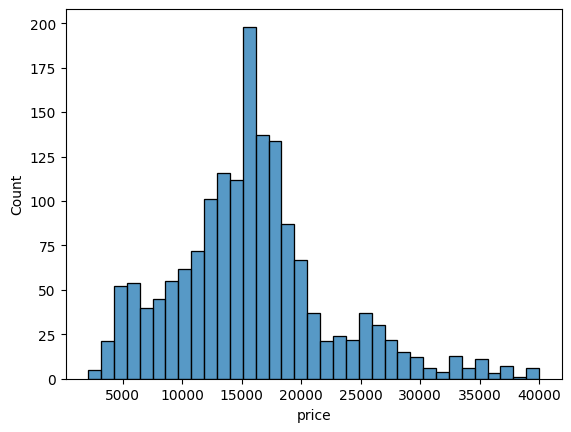

In [19]:
sns.histplot(data_train[(data_train['price']<=40000) & (data_train['price']>1000)]['price'])

In [20]:
'''
data_train['ans']=data_train['running'] / data_train['year']
meds={s :data_train[data_train['status']==s]['price'].median() for s in data_train['status'].unique()}

data_train['status_med']=data_train['status'].map(meds)
data_train=pd.get_dummies(data_train).astype(float)

data_train['run_status']=data_train['status_med']*data_train['running']
data_train['status_year']=data_train['status_med'] / (2024-data_train['year'])
num_cols=data_train.select_dtypes(include='number').columns
print(num_cols)
for col in num_cols:
    sns.boxplot(data=data_train,y=col)
    plt.show()
'''

"\ndata_train['ans']=data_train['running'] / data_train['year']\nmeds={s :data_train[data_train['status']==s]['price'].median() for s in data_train['status'].unique()}\n\ndata_train['status_med']=data_train['status'].map(meds)\ndata_train=pd.get_dummies(data_train).astype(float)\n\ndata_train['run_status']=data_train['status_med']*data_train['running']\ndata_train['status_year']=data_train['status_med'] / (2024-data_train['year'])\nnum_cols=data_train.select_dtypes(include='number').columns\nprint(num_cols)\nfor col in num_cols:\n    sns.boxplot(data=data_train,y=col)\n    plt.show()\n"

<Axes: xlabel='running', ylabel='Count'>

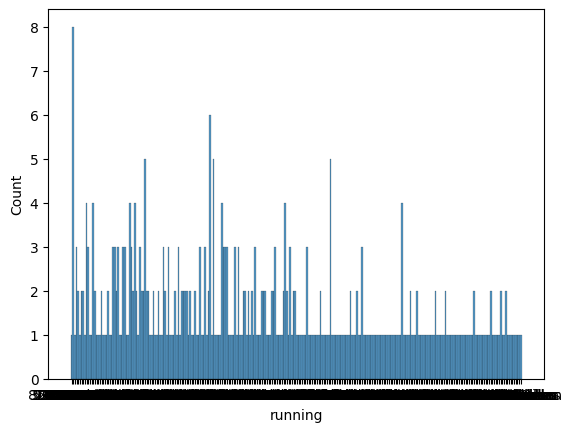

In [21]:

sns.histplot(data_test['running'])

Conclusiones:
- Pasar todas las dist a KM
- Pasar las categoricas a numericas
- Revisar los outliers de Price y su efecto
- Sustituir status por la mediana
- Dropear Color (de momento, muchas categorias)

37510.887314748164
-5545.620566879708
outs:  14


<Axes: xlabel='price', ylabel='Count'>

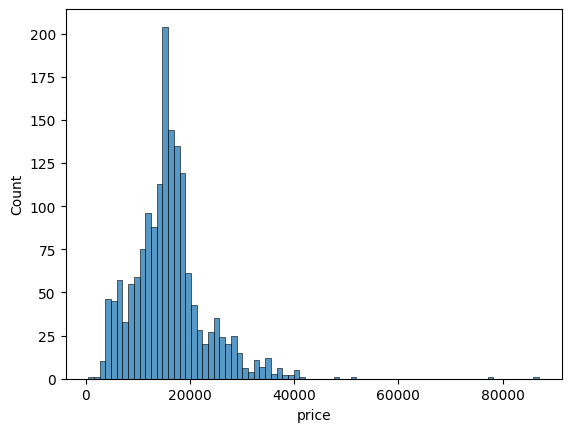

In [22]:
med=data_train['price'].mean()
std=data_train['price'].std()

print(med+3*std)
print(med-3*std)
print('outs: ',len(data_train[data_train['price']>37510]))
sns.histplot(data_train['price'])

In [23]:
data_test.motor_type.value_counts()

motor_type
petrol            356
gas                36
petrol and gas     19
Name: count, dtype: int64